In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.optimize

In [4]:
print(os.listdir("."))


['test_abstract.prism', 'test_obs.prism', 'toy_mdp_1_robot_obs.prism', 'num_tasks_results_corrected', '.git', 'ModelScript', 'num_locales_results_corrected', '1R_2T_adv.tra', 'toy_mdp', '#toy_mdp_1_robot.prism#', 'partitioning_diagram.ipe', 'Graphs.ipynb', 'time_abstraction', 'num_robots_results_corrected', 'toy_mdp_1_robot_props.prism', 'idle_dump.py', 'model_checking_times_T.eps', 'toy_mdp_1_robot.prism', 'toy_mdp.prism', 'old results', 'decomposition.png', 'gridsize_results', '.ipynb_checkpoints', 'model_checking_times_L.eps']


Text(0.5, 0, 'Number of grid tiles')

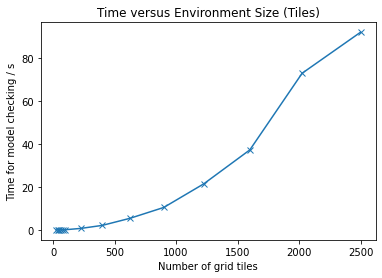

In [5]:
data = np.loadtxt("gridsize_results", delimiter=",")

plt.figure()
plt.plot(data[:,0]**2, data[:,1], marker = "x")
plt.title("Time versus Environment Size (Tiles)")
plt.ylabel("Time for model checking / s")
plt.xlabel("Number of grid tiles")

[2. 3. 4. 5. 6. 7. 8. 9.]
[4.70000e-02 2.11000e-01 1.86700e+00 4.09200e+00 1.30420e+01 2.13990e+01
 3.02570e+01 1.16696e+02]


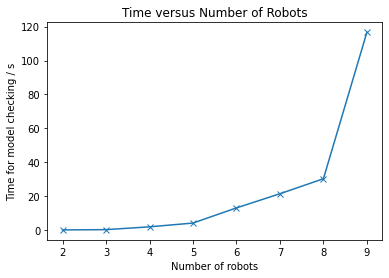

In [4]:
data = np.loadtxt("no_clock_numrobot_results", delimiter=" ")

plt.figure()
plt.plot(data[:,0], data[:,1], marker = "x")
plt.title("Time versus Number of Robots")
plt.ylabel("Time for model checking / s")
plt.xlabel("Number of robots")
print(data[:,0])
print(data[:,1])

/home/brendandevlin-hill/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


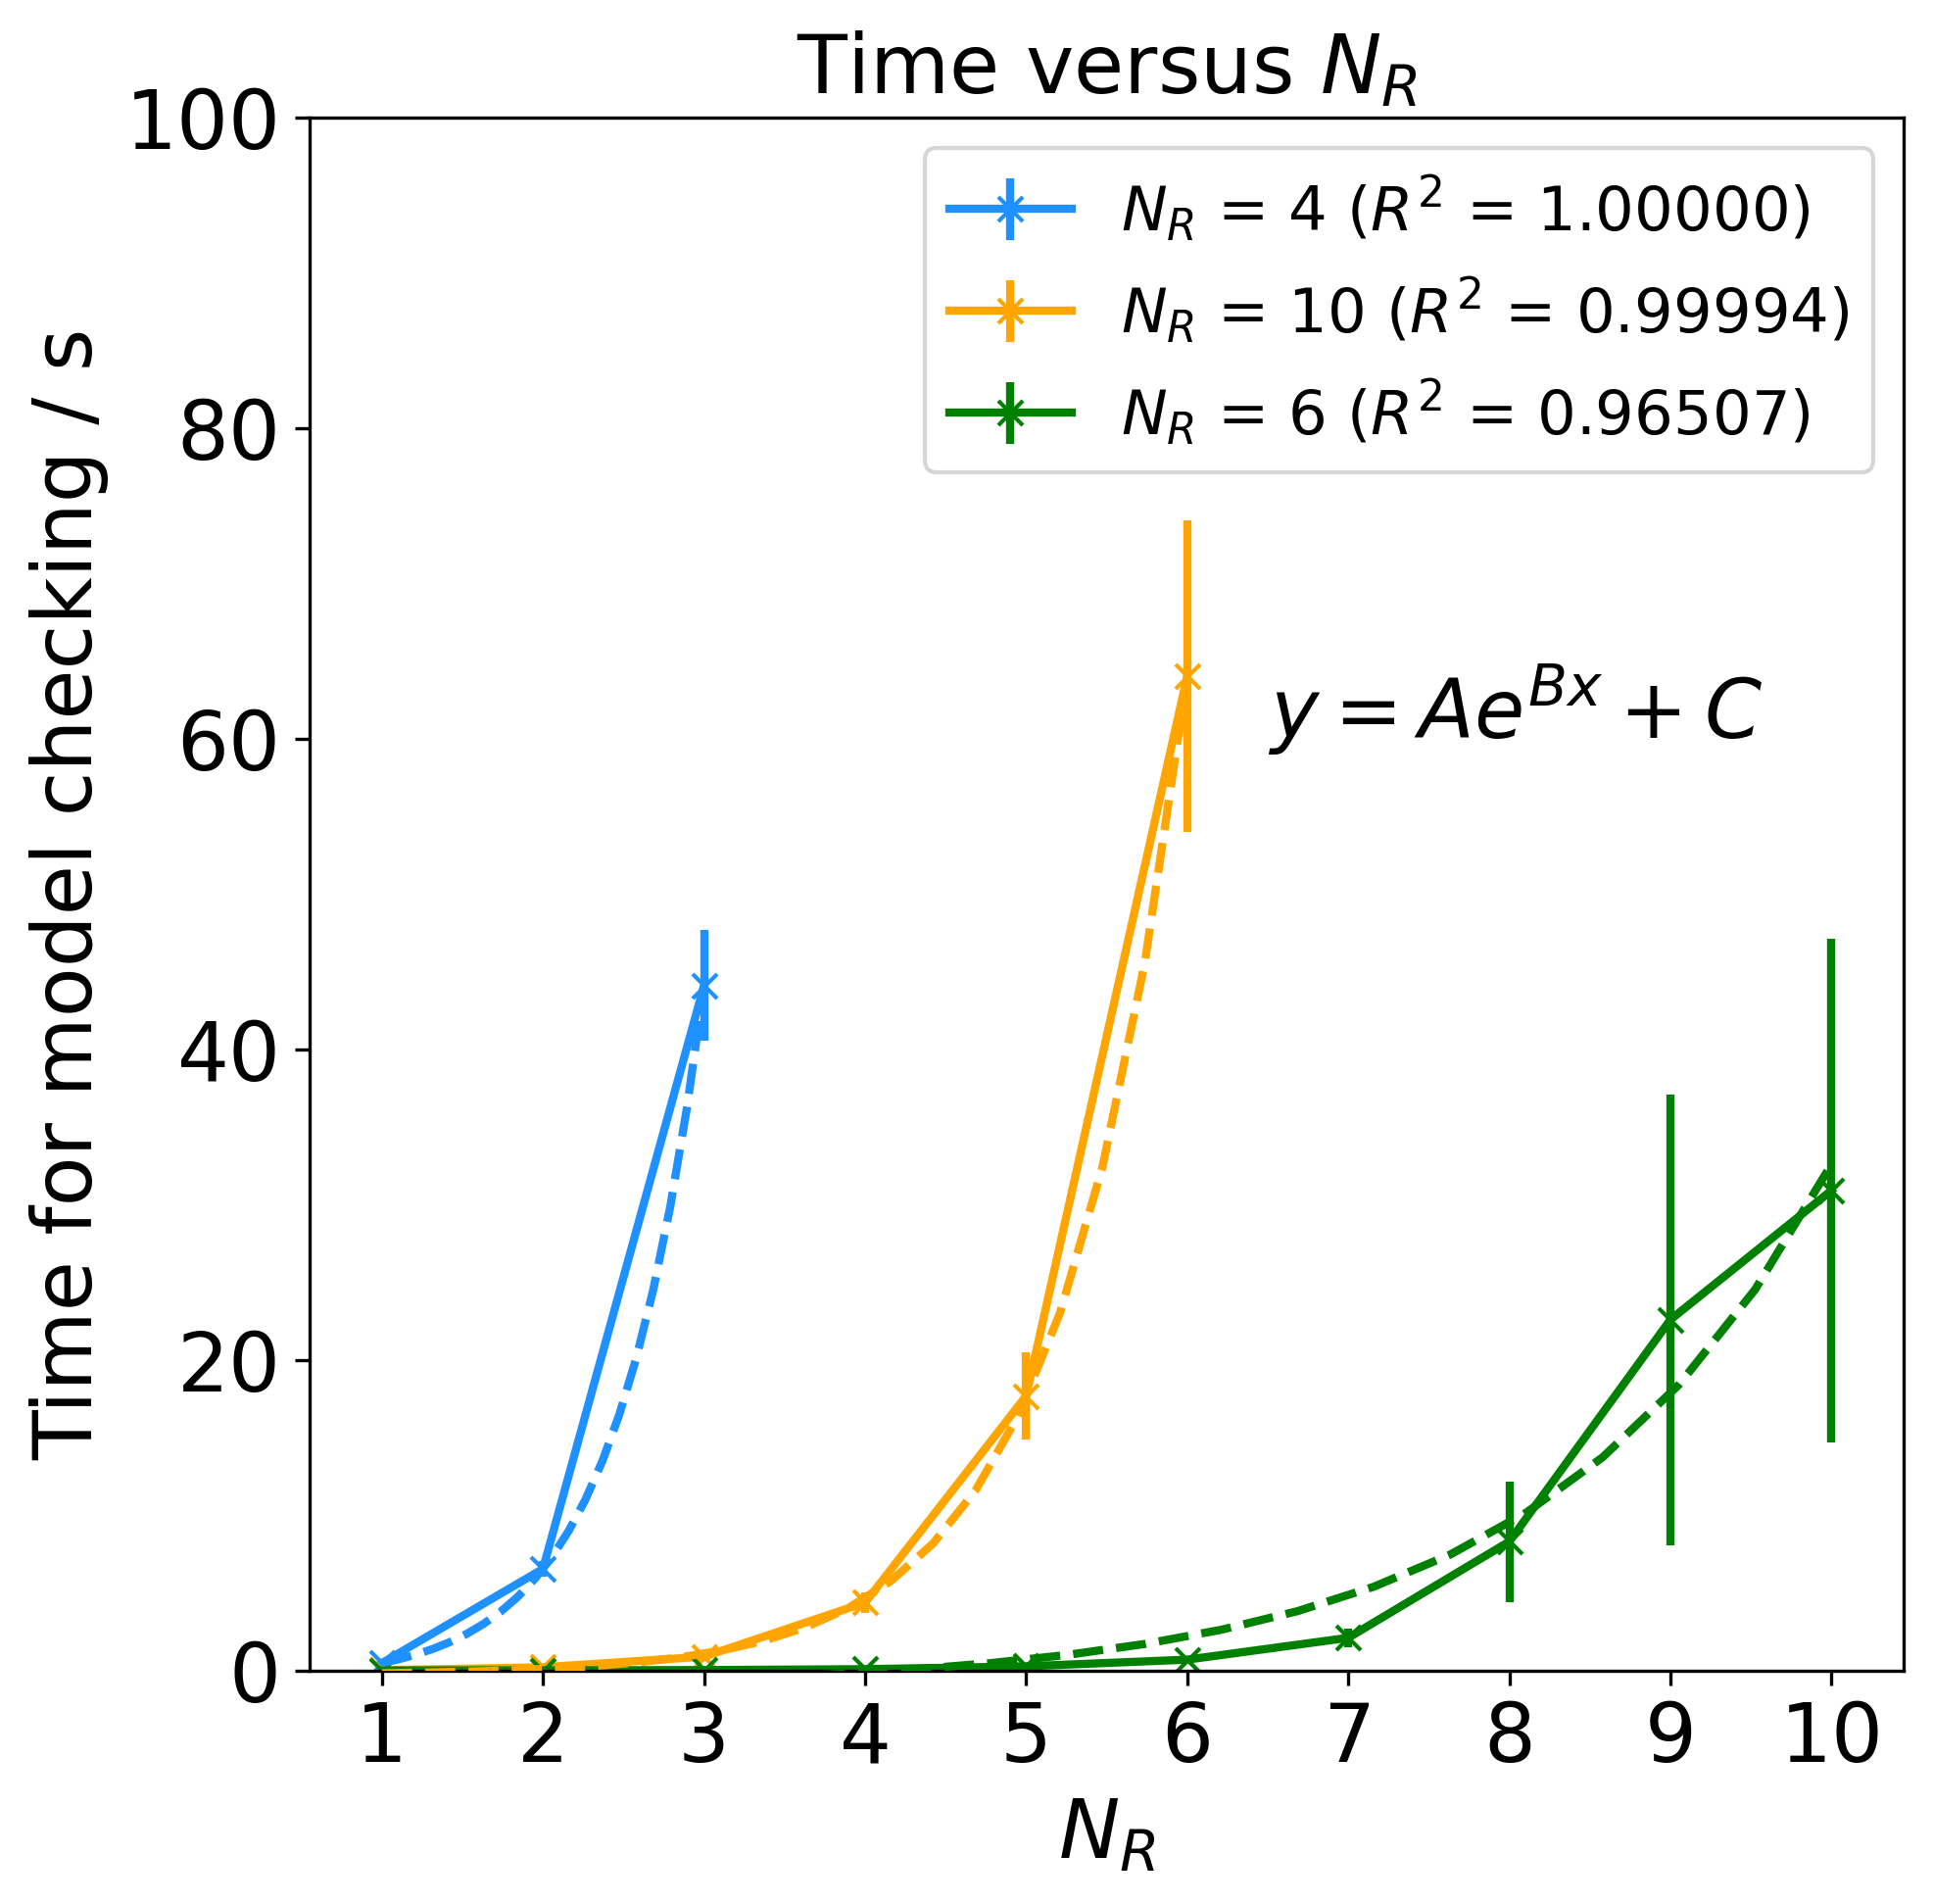

In [72]:
data = np.loadtxt("num_robots_results_corrected", delimiter=" ")

T10 = np.array([0,0,0])
T6 = np.array([0,0,0])
T14 = np.array([0,0,0])
for i in data:
    if i[0] == 10:
        T10 = np.vstack([T10, i[1:]])

    if i[0] == 6:
        T6 = np.vstack([T6, i[1:]])

    if i[0] == 14:
        T14 = np.vstack([T14, i[1:]])

p0 = (0.1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, T14[1:,0], T14[1:,1], p0)
A, B, C = params
expfits_T14 = exp(np.linspace(min(T14[1:,0]), max(T14[1:,0]),20), A, B, C)
squaredDiffs = np.square(T14[1:,1] - exp(T14[1:,0], A, B, C))
squaredDiffsFromMean = np.square(T14[1:,1] - np.mean(T14[1:,1]))
Rsqr_T14 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)

        
p0 = (0.1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, T10[1:,0], T10[1:,1], p0)
A, B, C = params
expfits_T10 = exp(np.linspace(min(T10[1:,0]),max(T10[1:,0]),20), A, B, C)
squaredDiffs = np.square(T10[1:,1] - exp(T10[1:,0], A, B, C))
squaredDiffsFromMean = np.square(T10[1:,1] - np.mean(T10[1:,1]))
Rsqr_T10 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)


p0 = (0.1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, T6[1:,0], T6[1:,1], p0)
A, B, C = params
expfits_T6 = exp(np.linspace(min(T6[1:,0]),max(T6[1:,0]),20), A, B, C)
squaredDiffs = np.square(T6[1:,1] - exp(T6[1:,0], A, B, C))
squaredDiffsFromMean = np.square(T6[1:,1] - np.mean(T6[1:,1]))
Rsqr_T6 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)





plt.figure(figsize = (7,7), dpi = 300)

plt.plot(np.linspace(1,len(T14[1:,0]),20), expfits_T14, ls = "--", zorder = 4, color = "dodgerblue", lw = 2)
plt.plot(np.linspace(1,len(T10[1:,0]),20), expfits_T10, ls = "--", zorder = 4, color = "orange", lw = 2)
plt.plot(np.linspace(1,len(T6[1:,0]),20), expfits_T6, ls = "--", zorder = 4, color = "g", lw = 2)
, lw = 2
plt.errorbar(T14[1:,0], T14[1:,1], T14[1:,2], marker = "x", label = "$N_R$ = 4 ($R^2$ = {:.5f})".format(Rsqr_T14), color = "dodgerblue", lw = 2)
plt.errorbar(T10[1:,0], T10[1:,1], T10[1:,2], marker = "x", label = "$N_R$ = 10 ($R^2$ = {:.5f})".format(Rsqr_T10), color = "orange", lw = 2)
plt.errorbar(T6[1:,0], T6[1:,1], T6[1:,2], marker = "x", label = "$N_R$ = 6 ($R^2$ = {:.5f})".format(Rsqr_T6), color = "g", lw = 2)

plt.legend(loc = "upper right", fontsize = 15)
plt.title("Time versus $N_R$", fontsize =20)
plt.ylabel("Time for model checking / s", fontsize =20)
plt.xticks(range(1,11), fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(0,100)
plt.xlabel("$N_R$", fontsize =20)
plt.text( x = 6.5, y = 60, s = "$y =  Ae^{Bx} + C$", fontsize =20)
;

plt.savefig('model_checking_times_R.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9943723210792803
0.9996497184240518


''

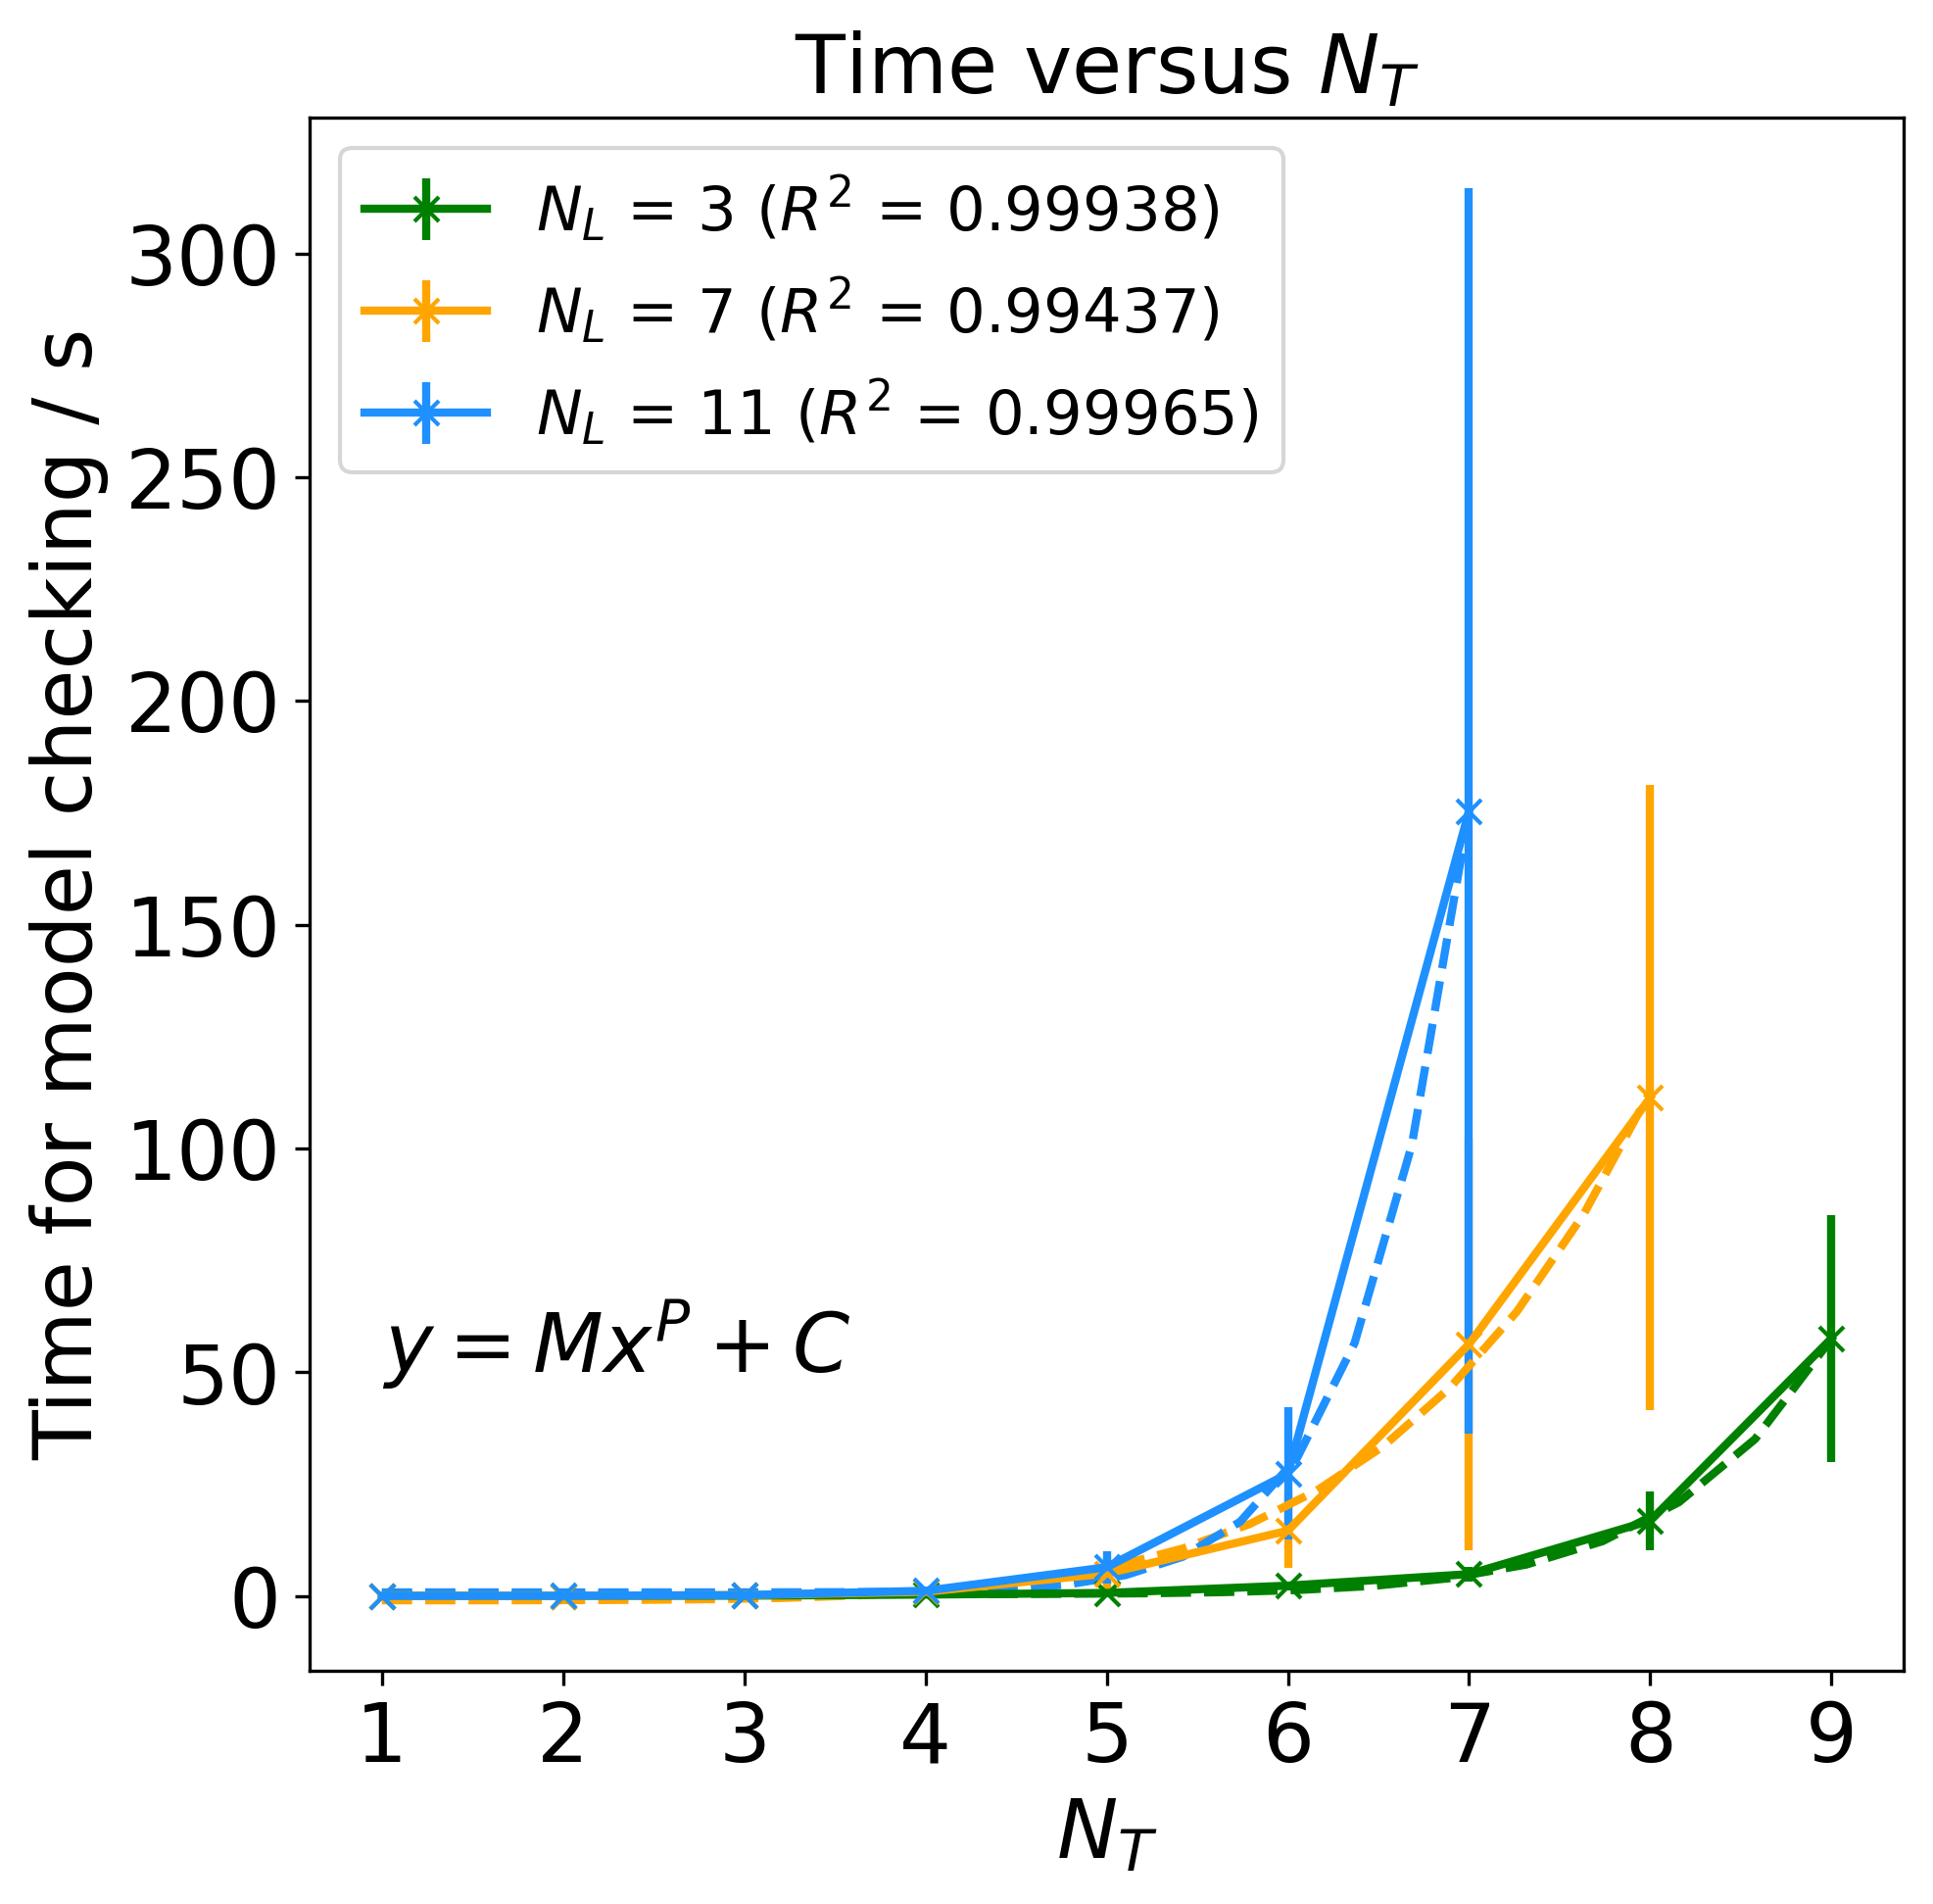

In [78]:
data = np.loadtxt("num_tasks_results_corrected", delimiter=" ")

L3 = np.array([0,0,0])
L7 = np.array([0,0,0])
L11 = np.array([0,0,0])

for i in data:
    if i[0] == 3:
        L3 = np.vstack([L3, i[1:]])
        
        
p0 = (1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(power_law, L3[1:,0], L3[1:,1], p0)
m,p,c = params
powerfits_L3 = power_law(np.linspace(min(L3[1:,0]),max(L3[1:,0]),20), m,p,c)
squaredDiffs = np.square(L3[1:,1] - power_law(L3[1:,0], m,p,c))
squaredDiffsFromMean = np.square(L3[1:,1] - np.mean(L3[1:,1]))
Rsqr_L3 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)


for i in data:
    if i[0] == 7:
        L7 = np.vstack([L7, i[1:]])
        
        
p0 = (1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(power_law, L7[1:,0], L7[1:,1], p0)
m,p,c = params
powerfits_L7 = power_law(np.linspace(min(L7[1:,0]),max(L7[1:,0]),20), m,p,c)
squaredDiffs = np.square(L7[1:,1] - power_law(L7[1:,0], m,p,c))
squaredDiffsFromMean = np.square(L7[1:,1] - np.mean(L7[1:,1]))
Rsqr_L7 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)

print(Rsqr_L7)


for i in data:
    if i[0] == 11:
        L11 = np.vstack([L11, i[1:]])
        
        
p0 = (1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(power_law, L11[1:,0], L11[1:,1], p0)
m,p,c = params
powerfits_L11 = power_law(np.linspace(min(L11[1:,0]) ,max(L11[1:,0]),20), m,p,c)
squaredDiffs = np.square(L11[1:,1] - power_law(L11[1:,0], m,p,c))
squaredDiffsFromMean = np.square(L11[1:,1] - np.mean(L11[1:,1]))
Rsqr_L11 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)

print(Rsqr_L11)


plt.figure(figsize = (7,7), dpi = 300)
plt.plot(np.linspace(1,len(L3[1:,0]),20), powerfits_L3, color = "green", ls = "--", lw = 2)
plt.plot(np.linspace(1,len(L7[1:,0]),20), powerfits_L7, color = "orange", ls = "--", lw = 2)
plt.plot(np.linspace(1,len(L11[1:,0]),20), powerfits_L11, color = "dodgerblue", ls = "--", lw = 2)

plt.errorbar(L3[1:,0], L3[1:,1], L3[1:,2], marker = "x", label = "$N_L$ = 3 ($R^2$ = {:.5f})".format(Rsqr_L3), color = "green", lw = 2)
plt.errorbar(L7[1:,0], L7[1:,1], L7[1:,2], marker = "x", label = "$N_L$ = 7 ($R^2$ = {:.5f})".format(Rsqr_L7), color = "orange", lw = 2)
plt.errorbar(L11[1:,0], L11[1:,1], L11[1:,2], marker = "x", label = "$N_L$ = 11 ($R^2$ = {:.5f})".format(Rsqr_L11), color = "dodgerblue", lw = 2)

plt.legend(loc = "upper left", fontsize = 15)
#plt.title("Time versus Number of Tasks")
plt.ylabel("Time for model checking / s", fontsize = 20)
plt.xticks(range(1,len(L3), 1), fontsize = 20)
plt.yticks(range(0,301,50), fontsize = 20)
#plt.xlim(1.5,len(L3)+0.5)
plt.xlabel("$N_T$", fontsize = 20)
plt.text( x = 1, y = 50, s = "$y = Mx^P + C$", fontsize =20)
plt.title("Time versus $N_T$", fontsize =20)
plt.savefig('model_checking_times_T.eps', format='eps')
;
# try an exponential fit?

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


''

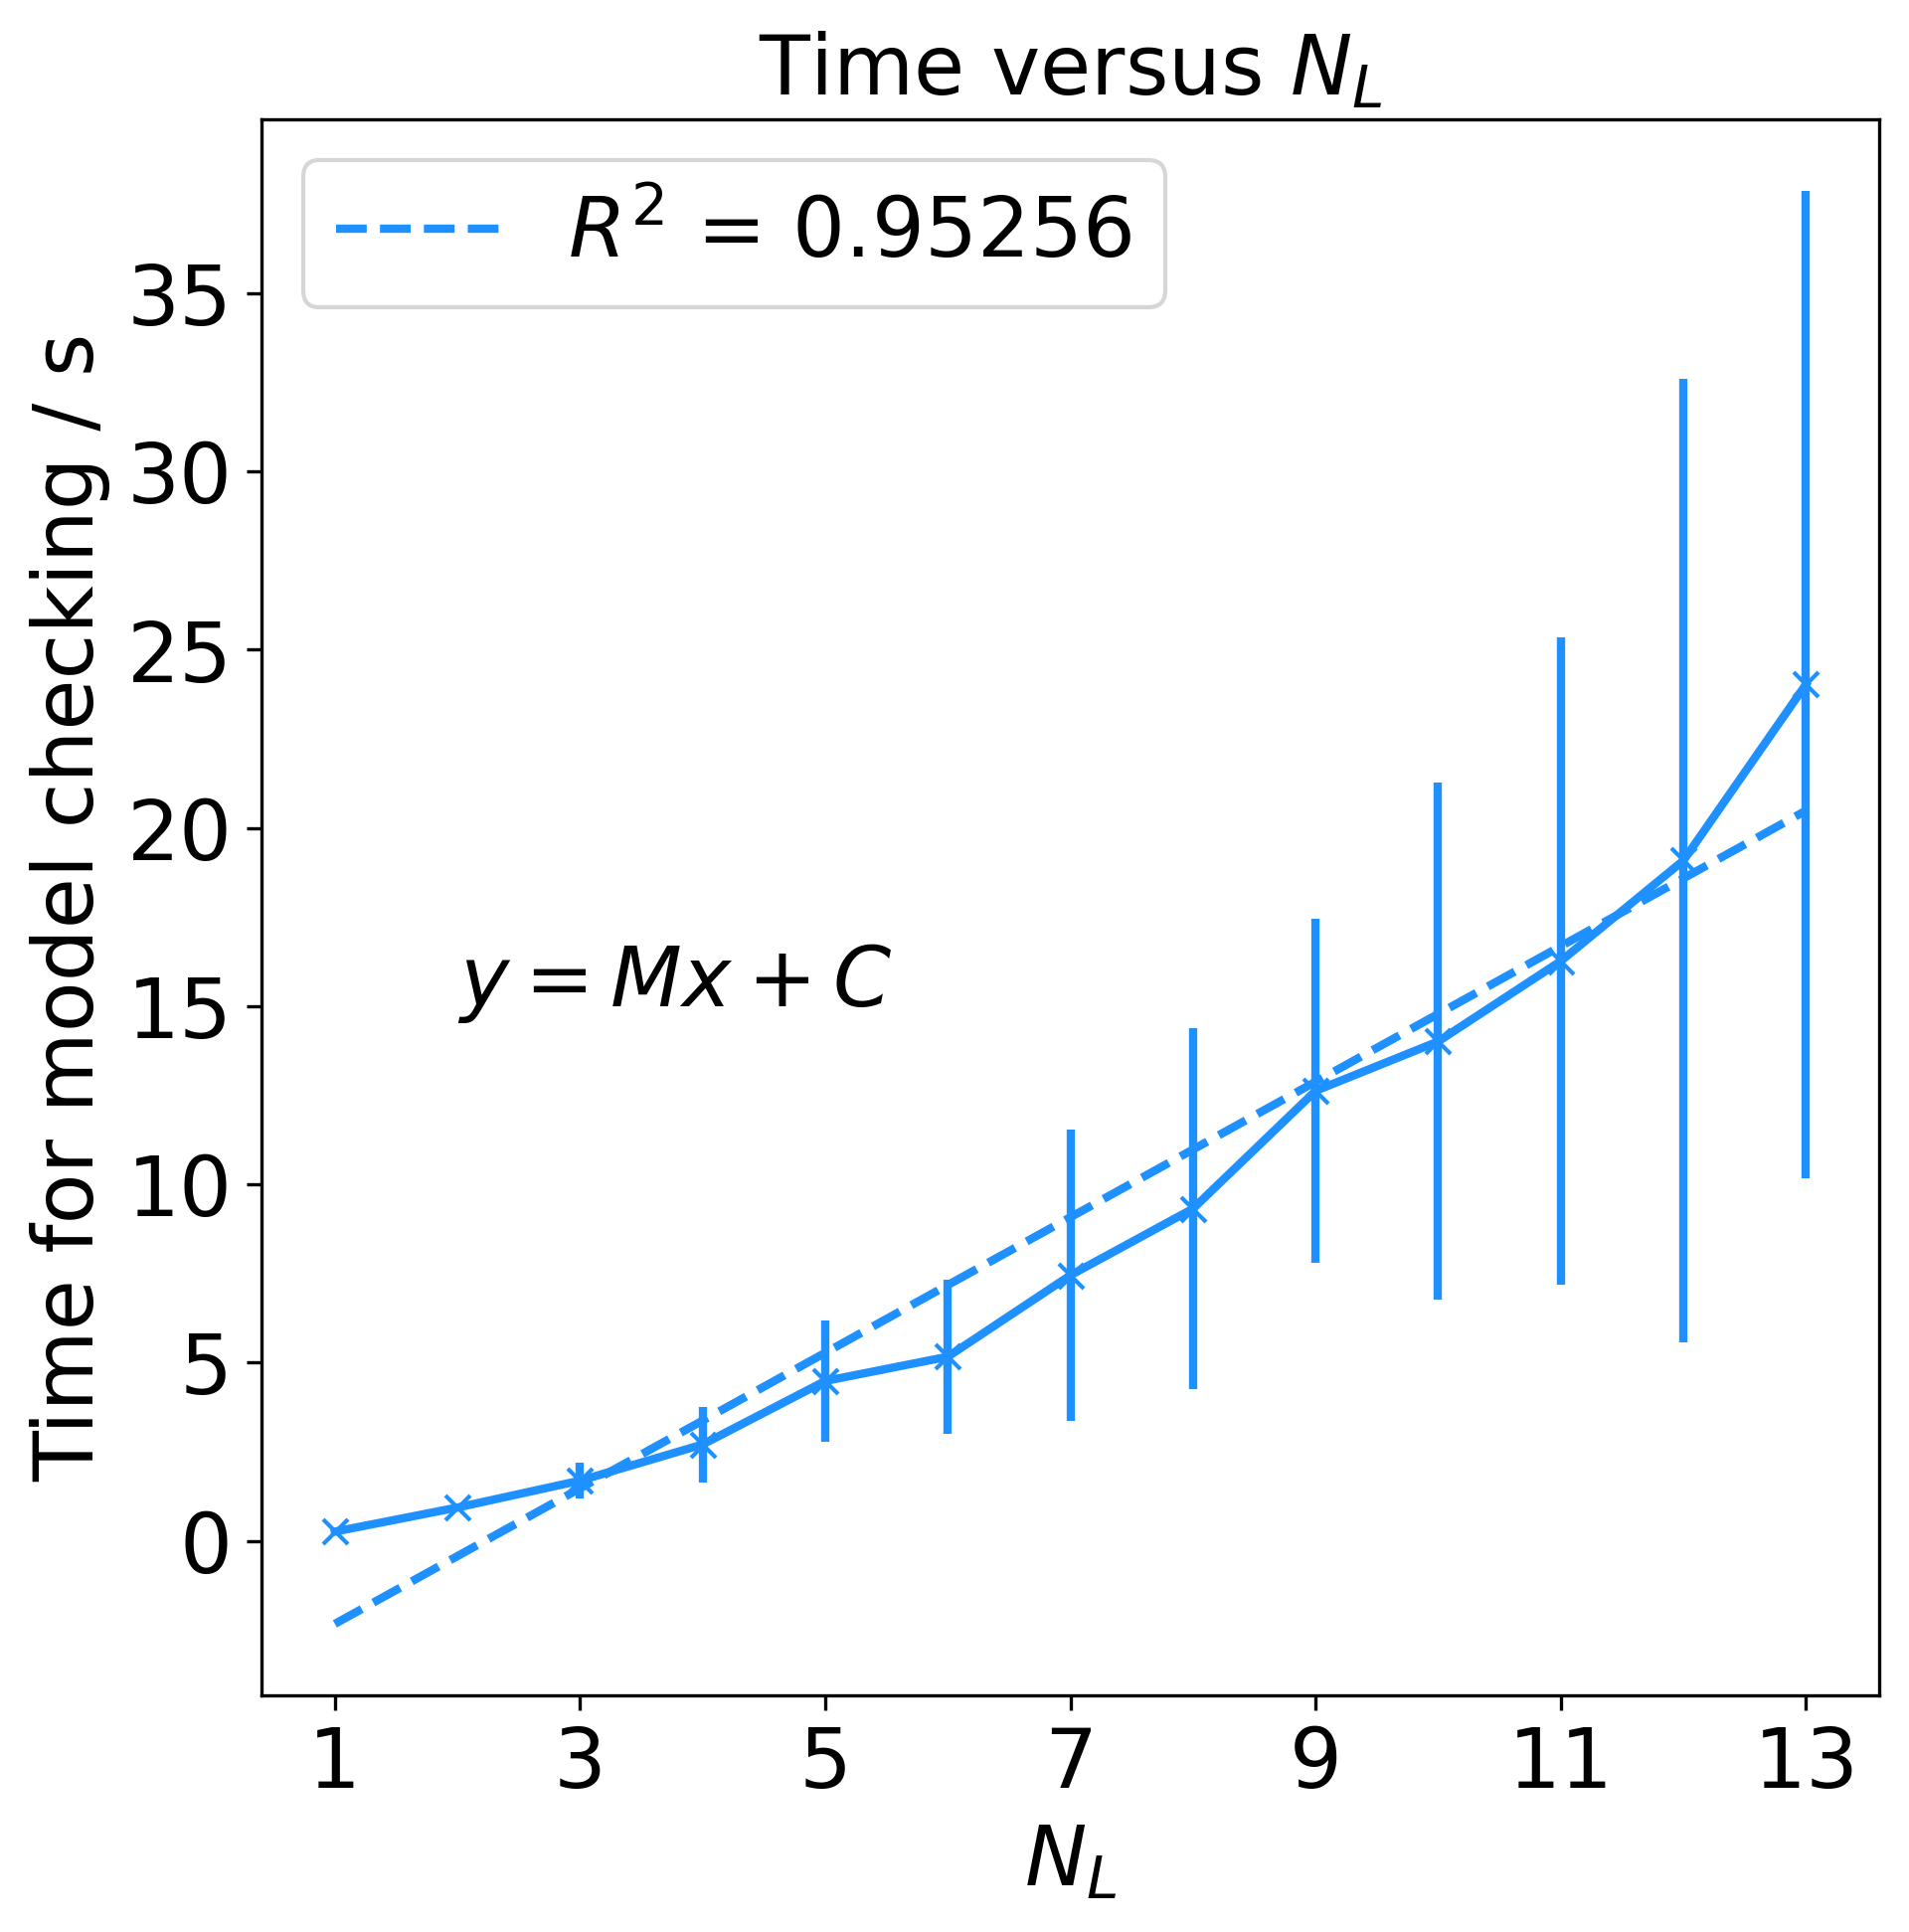

In [84]:
data = np.loadtxt("num_locales_results_corrected", delimiter=" ")

R5 = np.array([0,0,0])

for i in data:
    if i[0] == 5:
        R5 = np.vstack([R5, i[1:]])
        
        
p0 = (1, 1) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(linear_rel, R5[1:,0], R5[1:,1], p0)
m,c = params
linearfits_R5 = linear_rel(np.linspace(min(R5[1:,0]), max(R5[1:,0]),20), m,c)
squaredDiffs = np.square(R5[1:,1] - linear_rel(R5[1:,0], m,c))
squaredDiffsFromMean = np.square(R5[1:,1] - np.mean(R5[1:,1]))
Rsqr_R5 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)


R3 = np.array([0,0,0])

# for i in data:
#     if i[0] == 3:
#         R3 = np.vstack([R3, i[1:]])
        
# print(R3)

# p0 = (1, 1) # start with values near those we expect
# params, cv = scipy.optimize.curve_fit(linear_rel, R3[1:,0], R3[1:,1], p0)
# m,c = params
# linearfits_R3 = linear_rel(np.linspace(min(R3[:,0]), max(R3[:,0]),20), m,c)
# squaredDiffs = np.square(R3[1:,1] - linear_rel(R3[1:,0], m,c))
# squaredDiffsFromMean = np.square(R3[1:,1] - np.mean(R3[1:,1]))
# Rsqr_R3 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)


plt.figure(figsize = (7,7), dpi = 300)
plt.errorbar(R5[1:,0], R5[1:,1], R5[1:,2], marker = "x", label = "", color  = "dodgerblue", lw = 2)
plt.plot(np.linspace(min(R5[1:,0]), max(R5[1:,0]),20), linearfits_R5, color = "dodgerblue", ls = "--", label = "$R^2$ = {:.5f}".format(Rsqr_R5), lw = 2)



#plt.plot(np.linspace(min(R3[:,0]), max(R3[:,0]),20), linearfits_R3, color = "orange", ls = "--")
#plt.errorbar(R3[0:,0], R3[0:,1], R3[0:,2], marker = "x", label = "3 robots, 6 tasks, $R^2$ = {:.5f}".format(Rsqr_R3), color  = "orange")


plt.legend(loc = "upper left", fontsize = 20)
plt.title("Time versus $N_L$", fontsize = 20)
plt.ylabel("Time for model checking / s", fontsize = 20)
plt.xticks(range(1,len(R5), 2), fontsize = 20)
plt.yticks(range(0, 35+1, 5), fontsize = 20)
plt.xlabel("$N_L$", fontsize = 20)
plt.text( x = 2, y = 15, s = "$y = Mx+C$", fontsize =20)
plt.savefig('model_checking_times_L.eps', format='eps')
;


In [6]:
def exp(x_vals, A=1, B=1, C=0):
    
    r = []
    
    for x in x_vals:
        r.append(A * np.exp(B*x) + C)
    
    return np.array(r)

In [7]:
def power_law(x_vals, m, p, c):
    
    r = []
    
    for x in x_vals:
        r.append(m*x**p + c)
        
    return np.array(r)

In [8]:
def linear_rel(x_vals, m,c):
    
    r = []
    
    for x in x_vals:
        r.append(m*x + c)
        
    return np.array(r)